In [1]:
# standard scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)#在控制台输出过程中,默认小数会以科学计数法的形式输出
import warnings
warnings.filterwarnings('ignore') # 忽视

In [2]:
views = pd.DataFrame([1295., 25., 19000., 5., 1., 300.], columns=['views'])
ss = StandardScaler() # 初始化标准差
views['zscore'] = ss.fit_transform(views[['views']])
views

,views,zscore
0,1295.0,-0.307214
1,25.0,-0.489306
2,19000.0,2.231317
3,5.0,-0.492173
4,1.0,-0.492747
5,300.0,-0.449877


In [3]:
vw = np.array(views["views"])
print((vw[2] - np.mean(vw)) / np.std(vw))

2.2313170866252987


In [4]:
# Min-Max Scaler
mms = MinMaxScaler()
views['minmax'] = mms.fit_transform(views[['views']])
views

,views,zscore,minmax
0,1295.0,-0.307214,0.068109
1,25.0,-0.489306,0.001263
2,19000.0,2.231317,1.000000
3,5.0,-0.492173,0.000211
4,1.0,-0.492747,0.000000
5,300.0,-0.449877,0.015738


## 多项式

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as spstats # 统计函数
%matplotlib inline

In [6]:
mpl.style.reload_library()
mpl.style.use('classic') # 经典的
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0) # 画布背景颜色
mpl.rcParams['figure.figsize'] = [6.0, 4.0] # 宽是6.0英寸， 长是4.0英寸
mpl.rcParams['figure.dpi'] = 100 # 图片像素点

In [7]:
poke_df = pd.read_csv('../data/datasets/Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [8]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.describe()

,Attack,Defense
count,800.000000,800.000000
mean,79.001250,73.842500
std,32.457366,31.183501
min,5.000000,5.000000
25%,55.000000,50.000000
50%,75.000000,70.000000
75%,100.000000,90.000000
max,190.000000,230.000000


In [9]:
atk_def

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
5,64,58
6,84,78
7,130,111
8,104,78
9,48,65


In [10]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [11]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0
5,64.0,58.0,4096.0,3712.0,3364.0
6,84.0,78.0,7056.0,6552.0,6084.0
7,130.0,111.0,16900.0,14430.0,12321.0
8,104.0,78.0,10816.0,8112.0,6084.0
9,48.0,65.0,2304.0,3120.0,4225.0


# 数据分箱 技术 binning 特性

In [12]:
fcc_survey_df = pd.read_csv(
    '../data/datasets/fcc_coder_survey_subset.csv',
    encoding='utf-8'
)
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


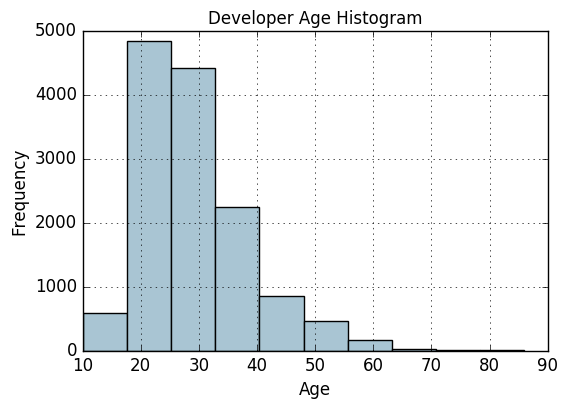

In [13]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')# 蓝色D3的话就是去不去饱和、满意度
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12) #Frequency频率
plt.show()

In [14]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age'] / 10.)))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [15]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


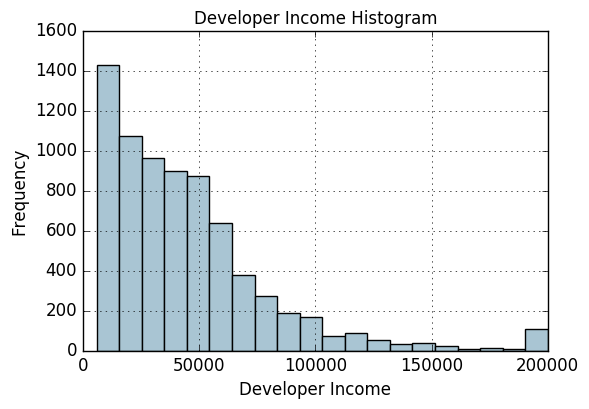

In [16]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=20, color='#A9C5D3')#
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [17]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

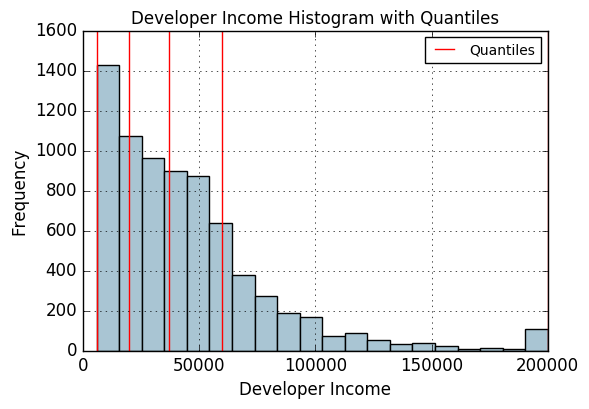

In [18]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=20, color='#A9C5D3')
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r') #axvline:用于画竖线,0分位、1/4分位、1/2分位、3/4分位和1分位
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [19]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantitle_range'] = pd.qcut(
    fcc_survey_df['Income'], q=quantile_list
)
fcc_survey_df['Income_quantile_label'] = pd.qcut(
    fcc_survey_df['Income'],
    q=quantile_list,
    labels=quantile_labels
)
fcc_survey_df[['Income', 'Income_quantitle_range', 'Income_quantile_label']]

,Income,Income_quantitle_range,Income_quantile_label
0,32000.0,"(20000.0, 37000.0]",25-50Q
1,15000.0,"(5999.999, 20000.0]",0-25Q
2,48000.0,"(37000.0, 60000.0]",50-75Q
3,43000.0,"(37000.0, 60000.0]",50-75Q
4,6000.0,"(5999.999, 20000.0]",0-25Q
5,40000.0,"(37000.0, 60000.0]",50-75Q
6,32000.0,"(20000.0, 37000.0]",25-50Q
7,40000.0,"(37000.0, 60000.0]",50-75Q
8,80000.0,"(60000.0, 200000.0]",75-100Q
9,80000.0,"(60000.0, 200000.0]",75-100Q


# 对数变换 COX-BOX


In [20]:
fcc_survey_df['Income_log'] = np.log((1 + fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']]

,ID.x,Age,Income,Income_log
0,cef35615d61b202f1dc794ef2746df14,28.0,32000.0,10.373522
1,323e5a113644d18185c743c241407754,22.0,15000.0,9.615872
2,b29a1027e5cd062e654a63764157461d,19.0,48000.0,10.778977
3,04a11e4bcb573a1261eb0d9948d32637,26.0,43000.0,10.668979
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794
9,265fa78a1fb2409ff5416aec3c4f950d,33.0,80000.0,11.289794


# 特征工程-类别型

In [21]:
#单字节编码,最多能表示的字符范围是0-255,应用于英文系列。比如,字母a的编码为0x61=97
vg_df = pd.read_csv('../data/datasets/vgsales.csv', encoding="ISO-8859-1")
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [22]:
genres = np.unique(vg_df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
# label 标准化
gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [24]:
vg_df['GenreLabel'] = genre_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


### Map

In [25]:
poke_df = pd.read_csv('../data/datasets/Pokemon.csv', encoding='utf-8')
"""
frac ---- 抽取行的比例，例如frac=0.8, 就是抽取其中的 80%
random_state=None，取到数据不重复
random_state=1, 可以取得重复数据
reset_index(drop=True) 有时候 我们可能需要打混后数据集的 index(索引)，还是按照正常的排序
"""
poke_df = poke_df.sample(random_state=1, frac=1).reset_index(drop=True)
np.unique(poke_df['Generation'])

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [26]:
gen_ord_map = {
    'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3,
    'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6
}
poke_df['GenerationLabel'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel']].iloc[9: 19]

,Name,Generation,GenerationLabel
9,Swanna,Gen 5,5
10,Tyrogue,Gen 2,2
11,Exeggutor,Gen 1,1
12,Silcoon,Gen 3,3
13,SharpedoMega Sharpedo,Gen 3,3
14,TornadusTherian Forme,Gen 5,5
15,Leafeon,Gen 4,4
16,Infernape,Gen 4,4
17,Lillipup,Gen 5,5
18,SteelixMega Steelix,Gen 2,2


In [27]:
poke_df[['Name', 'Generation', 'Legendary']].iloc[4: 10]

,Name,Generation,Legendary
4,Octillery,Gen 2,False
5,Helioptile,Gen 6,False
6,Dialga,Gen 4,True
7,DeoxysDefense Forme,Gen 3,True
8,Rapidash,Gen 1,False
9,Swanna,Gen 5,False


###  One-hot Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# 标签编码, Gen 2 --> 1, Gen 6 -->5
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label']= gen_labels

# False ---> 0 True ---> 1
leg_le = LabelEncoder()
leg_labels = leg_le.fit_transform(poke_df['Legendary'])
poke_df['Lgnd_Label'] = leg_labels

poke_df_sub = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]
poke_df_sub.iloc[4: 10]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
4,Octillery,Gen 2,1,False,0
5,Helioptile,Gen 6,5,False,0
6,Dialga,Gen 4,3,True,1
7,DeoxysDefense Forme,Gen 3,2,True,1
8,Rapidash,Gen 1,0,False,0
9,Swanna,Gen 5,4,False,0


In [29]:
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_feature_labels

['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6']

In [30]:
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)
gen_features

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0


### Get Dummy

In [31]:
# dummies: 仿制品, poke: 一桶, 一堆
gen_dummy_features = pd.get_dummies(poke_df['Generation'], drop_first=True) #drop_first 表示去除one-hot编码后的第一列数据, 反之就有第一列
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4: 10]

,Name,Generation,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,1
6,Dialga,Gen 4,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,1,0,0,0
8,Rapidash,Gen 1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,1,0


In [32]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4: 10]

,Name,Generation,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,1,0,0,0,0
5,Helioptile,Gen 6,0,0,0,0,1
6,Dialga,Gen 4,0,0,1,0,0
7,DeoxysDefense Forme,Gen 3,0,1,0,0,0
8,Rapidash,Gen 1,0,0,0,0,0
9,Swanna,Gen 5,0,0,0,1,0


### 二值特征

In [33]:
popsong_df = pd.read_csv('../data/datasets/song_views.csv', encoding='utf-8')
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


In [34]:
watched = np.array(popsong_df['listen_count'])
watched[watched >= 1] =1  # 大于等于1的表示已经被听过了, 小于1的没有听过
popsong_df['watched'] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [35]:
from sklearn.preprocessing import Binarizer
# 其中参数threshold 表示大于0.9的数据表示为1, 小于等于 0.9的数表示为0
bn = Binarizer(threshold=0.9) 
pd_watched = bn.transform([popsong_df['listen_count']])
print(pd_watched)
pd_watched = pd_watched[0] # 就一个元素, 一维数组
popsong_df['pd_watched'] = pd_watched
popsong_df

[[1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
  0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0]]


,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


## Permutation Importance

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # 集成算法对解释模型效果是很好的
import warnings
warnings.filterwarnings("ignore")

In [37]:
data = pd.read_csv('../data/datasets/FIFA Statistics.csv')
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [38]:
# Man of the Match 最佳球员为y值
y = (data['Man of the Match'] == "Yes") # 转换标签
y[:5]

0     True
1    False
2    False
3     True
4    False
Name: Man of the Match, dtype: bool

In [39]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]] # 列表推导式. 只获取数值型数据, 非数值型就不要了

In [40]:
X = data[feature_names]
X.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0


In [41]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [42]:
import eli5
from eli5.sklearn import PermutationImportance
# 由大到小, 进行降序
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
# 把perm 加载进来
eli5.show_weights(perm, feature_names=val_X.columns.tolist())

Weight,Feature
0.0750 ± 0.1159,Goal Scored
0.0625 ± 0.0791,Corners
0.0437 ± 0.0500,Distance Covered (Kms)
0.0375 ± 0.0729,On-Target
0.0375 ± 0.0468,Free Kicks
0.0187 ± 0.0306,Blocked
0.0125 ± 0.0750,Pass Accuracy %
0.0125 ± 0.0500,Yellow Card
0.0063 ± 0.0468,Saves
0.0063 ± 0.0250,Offsides


### Partial Dependence Plots
*前提同样是应用在模型建立完成后进行使用,概述如下:*
- 首先选中一个样本数据, 此时想观察Ball Possession 这一列对结果的影响
- 保证其他特征列不变,改变当前观察列的值, 例如选择40%, 50%, 60%分别进行预测, 得到各自的结果.
- 对比结果就能知道当前列(Ball Possession) 对结果的影响情况

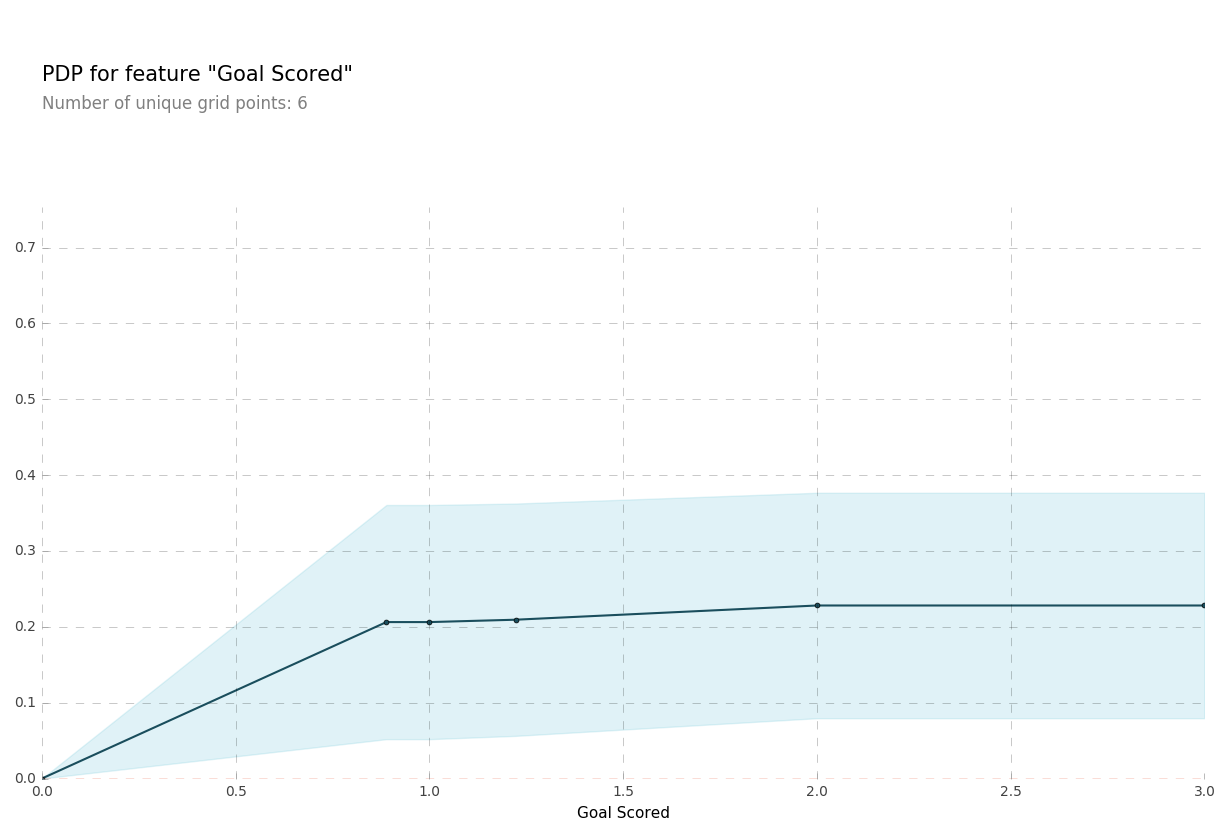

In [44]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

pdp_goals = pdp.pdp_isolate(
    model=my_model, 
    dataset=val_X, 
    model_features=feature_names,
    feature='Goal Scored'
) # 进球数量
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

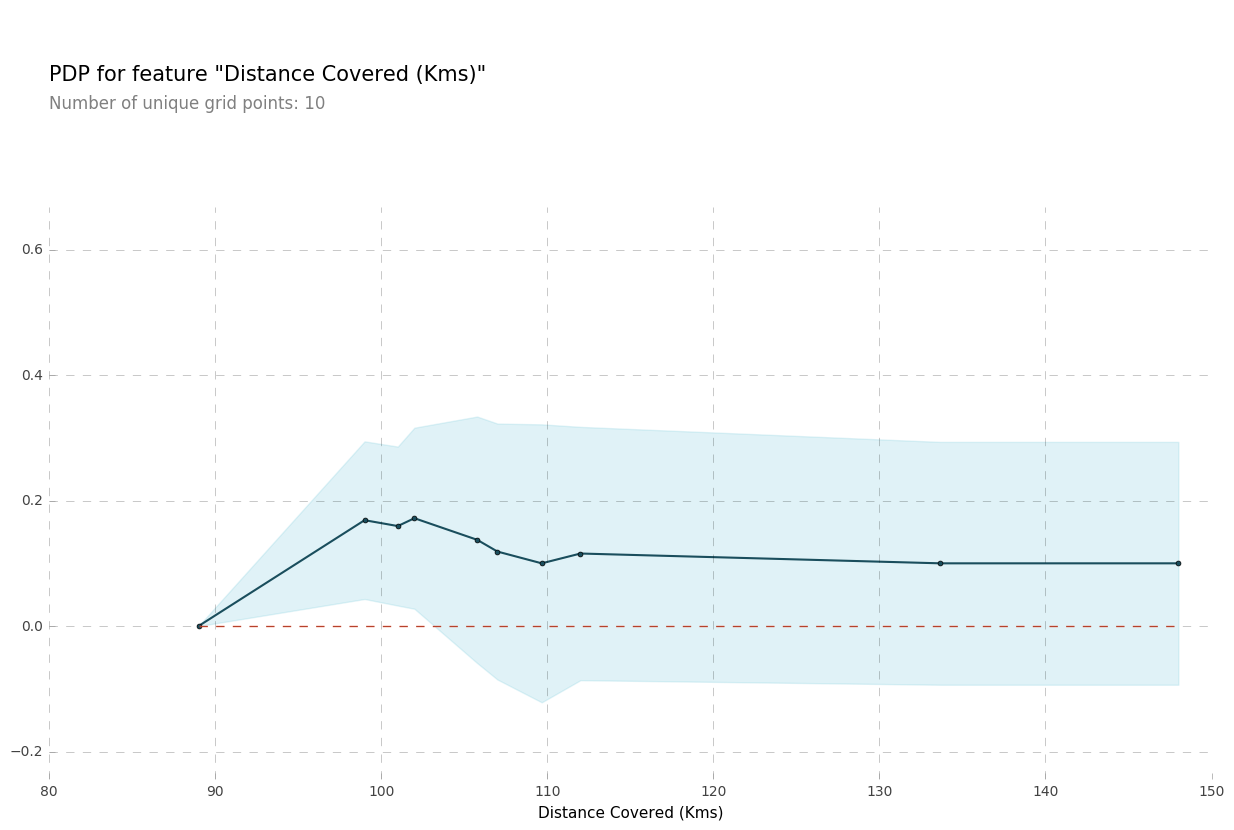

In [46]:
feature_to_plot = "Distance Covered (Kms)"
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
pdp_dist = pdp.pdp_isolate(
    model=rf_model, 
    dataset=val_X, 
    model_features=feature_names,
    feature=feature_to_plot
)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

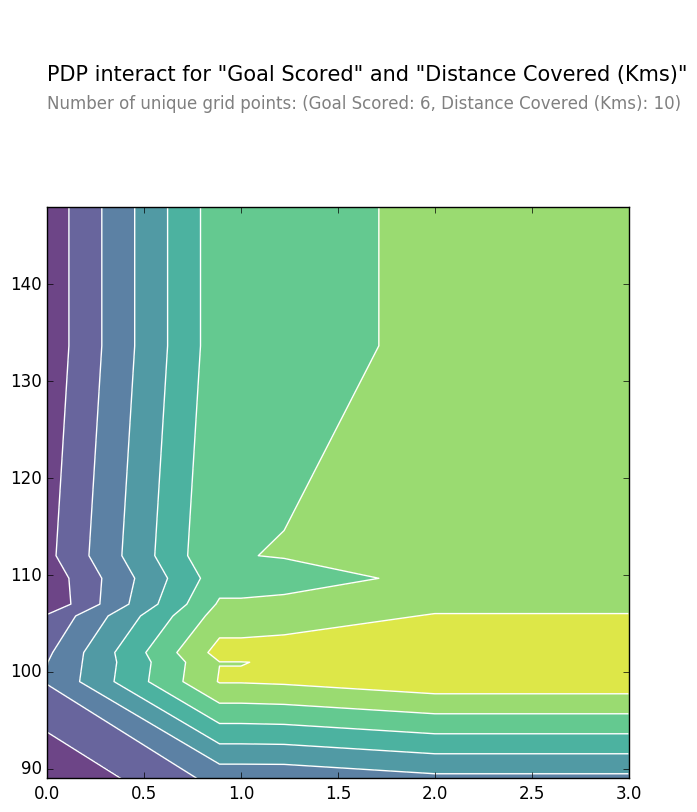

In [54]:
# 双特征观察
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1 = pdp.pdp_interact(model=rf_model, dataset=val_X,
model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1,
feature_names=features_to_plot, plot_type='contour')
plt.show()

### SHAP values
- 可以直观的展示每一个特征对结果走势的影响

In [55]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_model.predict_proba(data_for_prediction_array)

array([[0.3, 0.7]])

In [59]:
import shap
explainer = shap.TreeExplainer(my_model)
# 计算第5个的数据，一共是2行的数据
shap_values = explainer.shap_values(data_for_prediction)


- 返回的SHAP values中包括了negative 和 positive 两种情况， 通常一种(postive)

In [62]:
shap.initjs() # 显示格式转换
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

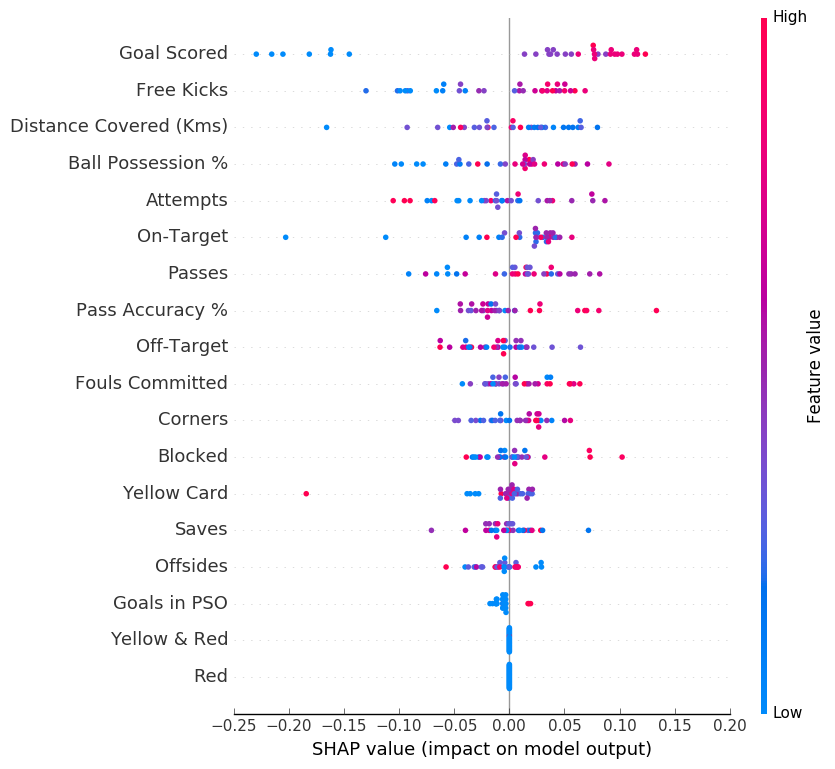

In [64]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(val_X)
shap.summary_plot(shap_values[1], val_X)

- 其中 y 轴表示每一特征，x 轴表示对结果是促进还是抑制作用， 不同的颜色表示作用效果， ColorBar 颜色越红， 值越大
- “GoalScored” 蓝色的点代表进球越少，该特征越抑制结果，进球越多，红色点， 对结果是促进的作用